[View in Colaboratory](https://colab.research.google.com/github/kaushik9728/ML-AcadviewCourse/blob/master/alternative%20for%20kmeans.ipynb)

#K-means is one of, if not the only, data clustering technique taught in statistics classes, so it only makes sense that business analysts would jump to it if a project necessitated market segmentation. K-means is, after all, fairly easy to understand under the hood and very efficient with large data sets you might see in a big data solution environment. But like all statistical methods, K-means clustering has some underlying assumptions.

**Real-life data is almost always messy. The examples and illustrations we see in our statistics courses are designed to reflect ideal situations that sadly almost never occur in the real world. When the K-means algorithm is run on a set of data, it's attempting to minimize the within-cluster variance with respect to the nearest centroid for how ever many centroids/clusters you told it to find a priori. This works best when your data is roughly "spherical," as in the toy data set below:**

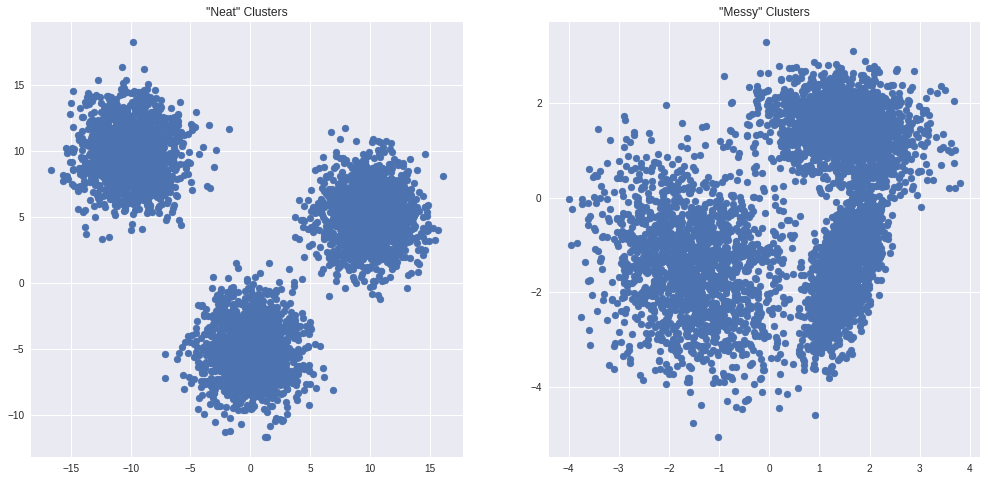

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

#Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=5000,
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

x_messy, _ = datasets.make_classification(n_samples=5000,
                                          n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)
#Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(122, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])

**The data set on the left seems to clearly exhibit three well-defined, spherical clusters while the set on the right is a little more... nebulous. Is it two clusters? Maybe three? While a scatter plot allows us to inspect our data for obvious clusters, K-means does not see like we do and will adhere to the algorithm.**

#Let's see how K-means would cluster the above two data sets:



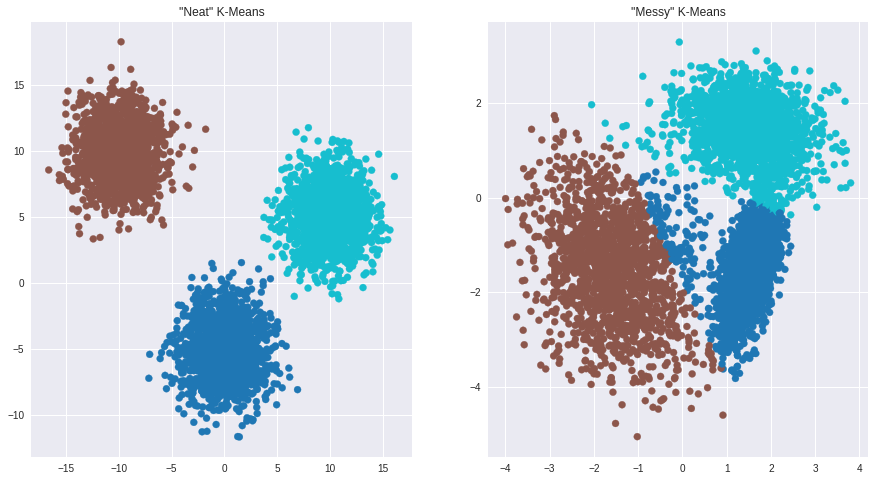

In [2]:
from sklearn.cluster import KMeans

#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap=cmap)
plt.subplot(122, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)

***Interesting results, to say the least. While the performance on the "neat" data set achieves excellent clustering, our "messy" data set — while not that bad — is suboptimal. Visually, we can see two, maybe three, clusters — but K-means creates partitions that don't particularly reflect that. Our clusters are of varying shapes and variances, which proves challenging for K-means to work with.***

**Let's take a step back: What makes data "spherical," anyway? Our "neat" clusters are composed of data points that are normally distributed and isotropic (i.e., the same variance in all directions) across the two dimensions of the plot. Our "messy" data is normally distributed as well, but not isotropic (it's "anisotropic" for you real geeks). Furthermore, the "messy" clusters aren't well separated, so K-means has a hard time judging which centroid each data point is closest to.**

#Now We WIll See Alternative for KMeans

#Gaussian Mixture Models (GMMs)

**Gaussian mixture models, or GMMs, work differently than K-means in that they allow for directional variation (although still assume approximate normality) and are a "soft clustering" method. **

#Simply put, GMMs fit a number of normal distributions to our data set by estimating their parameters using what's called expectation maximization. This is a two-step iterative algorithm (in some ways similar to K-means):

**1.Expectation: Generate a number of distributions with reasonable parameters (mean and variance) based on the given data, then "ask" every data point how likely is it to fall within each. As with K-means, you need to specify the number of clusters — or in this case, we call them "components" — a priori.**

**2.Maximization: Iterate and update our distribution parameters to maximize the data points' likelihood of being assigned to the most probable cluster.**

#Let's go back to our "messy" data set:



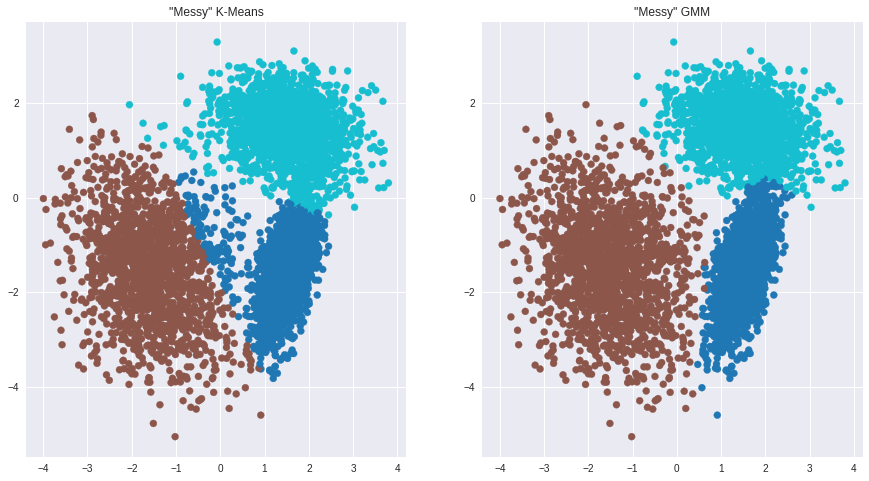

In [3]:
from sklearn.mixture import GaussianMixture

#Predict GMM cluster membership
gm_messy = GaussianMixture(n_components=3).fit(x_messy).predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)
plt.subplot(122, title='"Messy" GMM')
plt.scatter(x_messy[:,0], x_messy[:,1], c=gm_messy, cmap=cmap)


**Looks much better, right?**



*   Pros: GMM allows data to vary anisotropically and provides probability estimates of cluster membership rather than "hard labeling" data points like K-means.
*   Cons: GMM still assumes normal distributions across dimensions and requires the number of components/clusters are specified a priori.



# K-means is still a very useful algorithm for clustering. In no way am I attempting to get you, the reader, to toss it aside! However, every analyst can benefit from a more robust set of tools at their disposal. Happy clustering. 

 Rahul Kauhik